In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

%matplotlib inline

In [2]:
train = pd.read_csv("C:/Users/sripan/Desktop/AV Hack/train_jDb5RBj.csv")
test = pd.read_csv("C:/Users/sripan/Desktop/AV Hack/test_dan2xFI.csv")
print("train.shape" + str(train.shape))
print("test.shape" + str(test.shape))

train.shape(2618, 87)
test.shape(2553, 86)


In [3]:
print(train.columns)

Index(['ID', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO',
       'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
       'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045',
       'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT',
       'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT',
       'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 'APLEZIER', 'AF

In [4]:
train.shape

(2618, 87)

In [5]:
test.shape

(2553, 86)

In [6]:
test.describe(include=[np.number])

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.00000,2553.000000,2553.000000,2553.000000,2553.000000,...,2553.00000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000
mean,23.820603,1.114375,2.660008,2.994125,5.670584,0.70662,4.594595,1.071680,3.271445,6.148844,...,0.08774,0.006659,0.006267,0.004700,0.587152,0.000392,0.008617,0.033294,0.007051,0.016060
std,12.975046,0.394219,0.781568,0.822135,2.883308,1.02997,1.756471,1.041438,1.613385,1.918545,...,0.41350,0.081345,0.078932,0.073917,0.576057,0.019791,0.096592,0.203967,0.088245,0.128808
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.00000,4.000000,0.000000,2.000000,5.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,3.000000,3.000000,7.000000,0.00000,5.000000,1.000000,3.000000,6.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.00000,6.000000,2.000000,4.000000,7.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,7.000000,5.000000,6.000000,10.000000,9.00000,9.000000,5.000000,9.000000,9.000000,...,8.00000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,2.000000,2.000000,2.000000


In [506]:
train.describe(include=[np.object])

,ID
count,2618
unique,2618
top,ID2657
freq,1


In [507]:
test.describe(include=[np.object])

,ID
count,2553
unique,2553
top,ID1366
freq,1


In [7]:
train.iloc[:,:].describe(include = [np.number])

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
count,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,...,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000
mean,24.297937,1.102750,2.676853,3.010313,5.783040,0.713140,4.631398,1.054240,3.262414,6.178380,...,0.005348,0.008403,0.005730,0.603896,0.000764,0.004966,0.037433,0.010695,0.016043,0.062643
std,12.906702,0.414377,0.806123,0.817445,2.869787,1.006962,1.690326,0.985624,1.600621,1.926397,...,0.072945,0.091301,0.089396,0.554359,0.027634,0.075545,0.239675,0.102883,0.125664,0.242366
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,5.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000


In [8]:
print("Null exists at column:",pd.isnull(train).sum()[pd.isnull(train).sum() > 0])

Null exists at column: Series([], dtype: int64)


In [9]:
print("Null exists at column:",pd.isnull(test).sum()[pd.isnull(test).sum() > 0])

Null exists at column: Series([], dtype: int64)


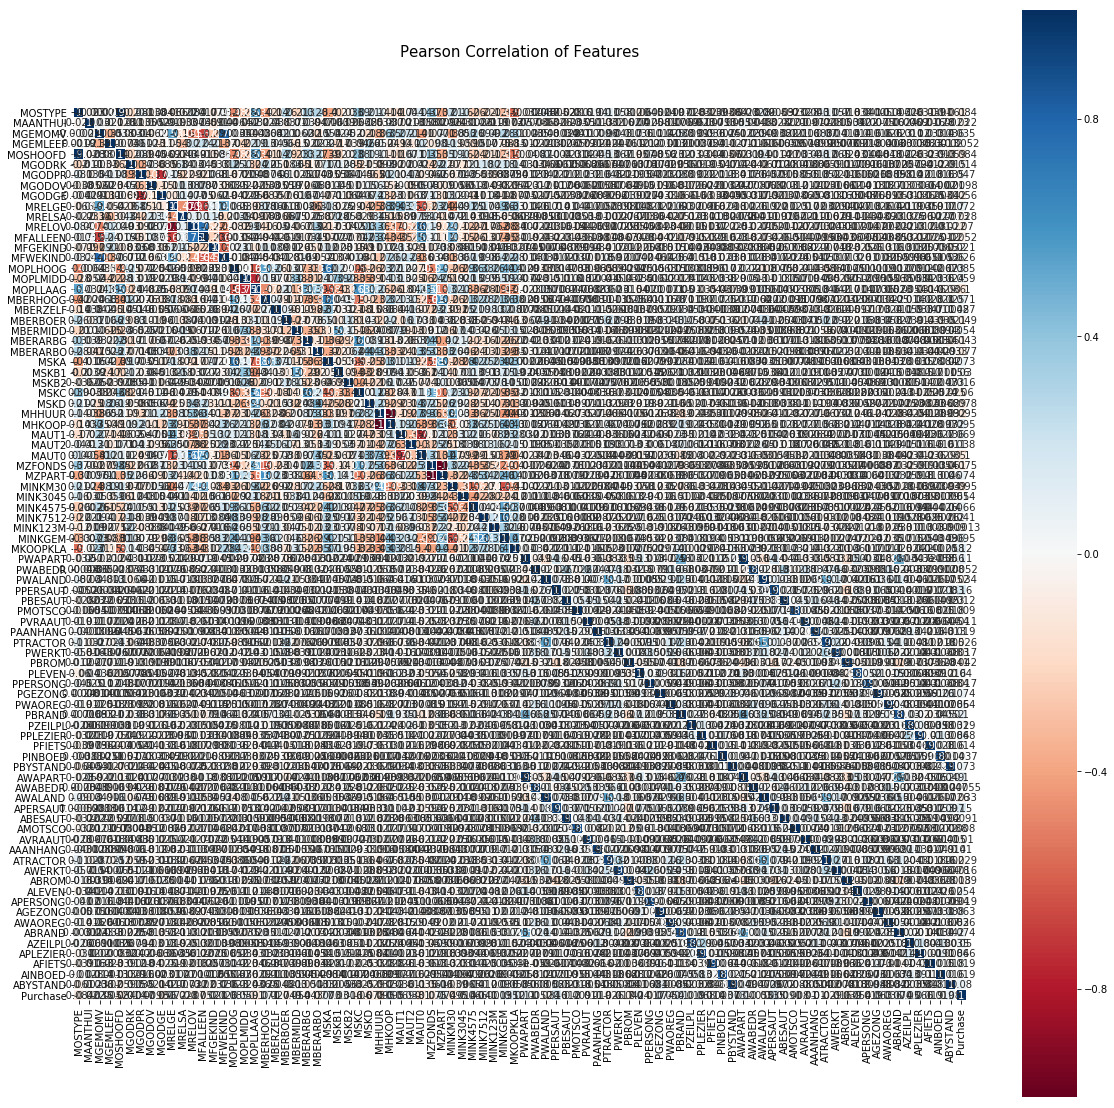

In [511]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.iloc[:,1:].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

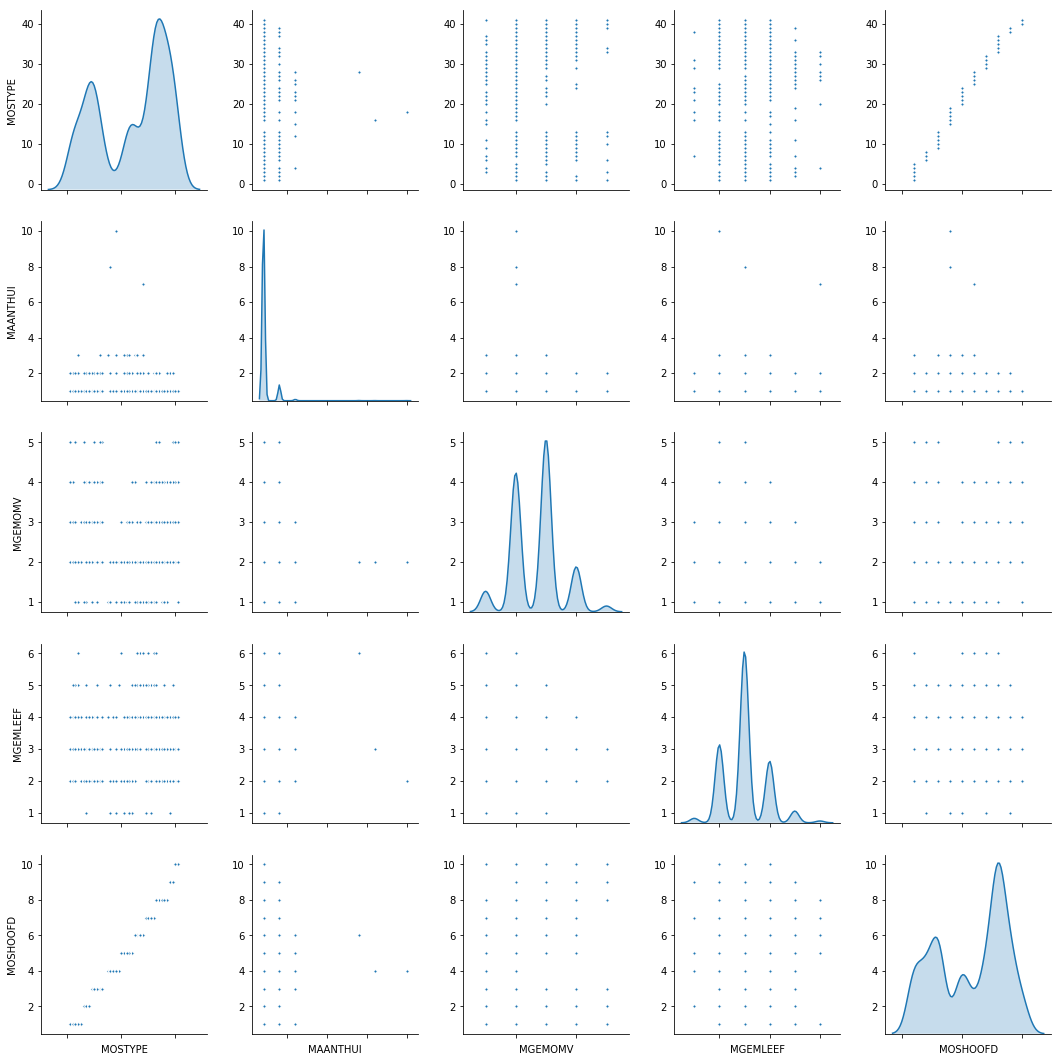

In [12]:
g = sns.pairplot(train[['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       ]], palette = 'seismic',size=3,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [513]:
len(set(train['ID']).intersection(set(test['ID'])))

0

In [514]:
train.Purchase.value_counts()

0    2454
1     164
Name: Purchase, dtype: int64

In [515]:
train.shape

(2618, 87)

In [516]:
print('Frequency of target class 1:', train.Purchase.value_counts()[1] , 'Frequency of target class 0:' , train.Purchase.value_counts()[0])
print('Pge of Minority class Frequency:', (train.Purchase.value_counts()[1]/train.Purchase.value_counts()[0])*100)

Frequency of target class 1: 164 Frequency of target class 0: 2454
Pge of Minority class Frequency: 6.68296658517


In [21]:
X = train.drop(['ID', 'Purchase'], axis=1)
Y = train["Purchase"]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.20, random_state = 0)

X_test = test.drop(['ID'], axis=1)
print(X_test.columns)

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [22]:
print('Pge of Frequency of target:', (Y_train.value_counts()[1]/Y_train.value_counts()[0])*100)
print('Pge of Minority class Frequency:', (Y_val.value_counts()[1]/Y_val.value_counts()[0])*100)

Pge of Frequency of target: 6.67345899134
Pge of Minority class Frequency: 6.72097759674


In [23]:
grid_values = {'learning_rate': [0.005, 0.01], 'max_depth': [1, 2, 3],'max_features': [ 5, 7, 10, 20]}
gbclf = GradientBoostingClassifier(random_state = 99)
grid_gbclf = GridSearchCV(gbclf, param_grid = grid_values, scoring = 'roc_auc', cv = 3, verbose = 1)
grid_gbclf.fit(X_train, Y_train)

means = grid_gbclf.cv_results_['mean_test_score']
stds = grid_gbclf.cv_results_['std_test_score']
params = grid_gbclf.cv_results_['params']
for mean, std, params in zip(means, stds, params): 
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

print("Best parameters set found on development set:",grid_gbclf.best_params_)

Y_true, Y_pred = Y_val, grid_gbclf.predict(X_val)
print(classification_report(Y_true, Y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
0.761 (+/-0.100) for {'learning_rate': 0.005, 'max_depth': 1, 'max_features': 5}
0.752 (+/-0.094) for {'learning_rate': 0.005, 'max_depth': 1, 'max_features': 7}
0.746 (+/-0.093) for {'learning_rate': 0.005, 'max_depth': 1, 'max_features': 10}
0.745 (+/-0.092) for {'learning_rate': 0.005, 'max_depth': 1, 'max_features': 20}
0.769 (+/-0.099) for {'learning_rate': 0.005, 'max_depth': 2, 'max_features': 5}
0.768 (+/-0.095) for {'learning_rate': 0.005, 'max_depth': 2, 'max_features': 7}
0.769 (+/-0.116) for {'learning_rate': 0.005, 'max_depth': 2, 'max_features': 10}
0.769 (+/-0.090) for {'learning_rate': 0.005, 'max_depth': 2, 'max_features': 20}
0.777 (+/-0.089) for {'learning_rate': 0.005, 'max_depth': 3, 'max_features': 5}
0.776 (+/-0.097) for {'learning_rate': 0.005, 'max_depth': 3, 'max_features': 7}
0.776 (+/-0.103) for {'learning_rate': 0.005, 'max_depth': 3, 'max_features': 10}
0.775 (+/-0.104) for {'learning_rate': 0.00

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.3s finished
c:\users\sripan\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
Y_true, Y_pred = Y_val, grid_gbclf.predict_proba(X_val)

fp_rate, tp_rate, thresholds = roc_curve(Y_true, Y_pred[:,1])
print(auc(fp_rate, tp_rate))

0.768808245387


In [25]:
Y_true, Y_pred = Y, grid_gbclf.predict_proba(X)

fp_rate, tp_rate, thresholds = roc_curve(Y_true, Y_pred[:,1])
print(auc(fp_rate, tp_rate))

0.833076162363


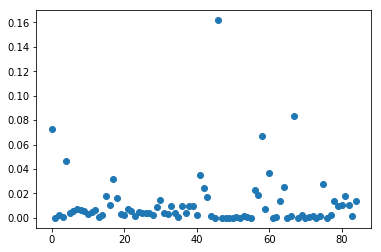

In [27]:
gbModel = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, max_features = 10)
gbModel.fit(X, Y)
plt.plot(gbModel.feature_importances_, 'o')

In [28]:
print(X_test.shape)
y_test_gbclf_pred = gbModel.predict_proba(X_test)[:,1]
test['Purchase'] = y_test_gbclf_pred
test.loc[:,['ID','Purchase']].to_csv('C:/Users/sripan/Desktop/AV Hack/GBMSubmission.csv',header=True,sep=',',index=False)

(2553, 85)


0.7923298581
0.742208233043 10
0.7923298581
0.742208233043 1
0.7923298581
0.742208233043 0.1
0.7923298581
0.742208233043 0.01
0.7923298581
0.742208233043 0.001


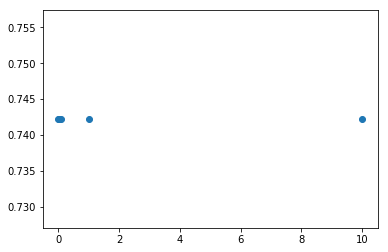

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

lrlist = [10,1,0.1,0.01,0.001]
valAuc=[]
for lr in lrlist:
    nnclf = MLPClassifier(hidden_layer_sizes = [35, 25, 10], activation ='relu',learning_rate_init=lr, learning_rate='constant',alpha = 15, random_state = 99, solver='lbfgs', verbose=1,early_stopping=True)
    nnclf.fit(X_train_scaled, Y_train)

    Y_true, Y_pred = Y_train, nnclf.predict_proba(X_train_scaled)
    fp_rate, tp_rate, thresholds = roc_curve(Y_true, Y_pred[:,1])
    print(auc(fp_rate, tp_rate))

    Y_true, Y_pred = Y_val, nnclf.predict_proba(X_val_scaled)
    fp_rate, tp_rate, thresholds = roc_curve(Y_true, Y_pred[:,1])
    print(auc(fp_rate, tp_rate),lr)
    valAuc.append(auc(fp_rate, tp_rate))
plt.scatter(lrlist,valAuc)

In [31]:
nnclf

MLPClassifier(activation='relu', alpha=15, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[30, 20, 10], learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=99, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

In [592]:
y_test_nnclf_pred = nnclf.predict_proba(scaler.transform(X_test))[:,1]
test['Purchase'] = y_test_nnclf_pred
test.loc[:,['ID','Purchase']].to_csv('C:/Users/sripan/Desktop/AV Hack/NNSubmission.csv',header=True,sep=',',index=False)

In [593]:
Y_test_pred = pd.Series((y_test_gbclf_pred + y_test_nnclf_pred )/2)
print(Y_test_pred.value_counts())
test['Purchase'] = y_test_rfclf_pred
test.to_csv('C:/Users/sripan/Desktop/AV Hack/NNGBRFSubmission.csv',header=True,sep=',',index=False)

0.036632    1
0.060499    1
0.031623    1
0.129345    1
0.116045    1
0.027241    1
0.176100    1
0.029969    1
0.093582    1
0.028124    1
0.058881    1
0.028567    1
0.026272    1
0.020680    1
0.023626    1
0.029643    1
0.044608    1
0.069412    1
0.078498    1
0.190856    1
0.112756    1
0.044536    1
0.041257    1
0.029510    1
0.133790    1
0.095426    1
0.123880    1
0.034194    1
0.066647    1
0.035026    1
           ..
0.029559    1
0.088044    1
0.064836    1
0.037770    1
0.078389    1
0.080589    1
0.048245    1
0.028843    1
0.039464    1
0.124580    1
0.058431    1
0.042234    1
0.041137    1
0.103554    1
0.078723    1
0.036120    1
0.031770    1
0.077790    1
0.035380    1
0.033088    1
0.065669    1
0.057175    1
0.024159    1
0.046227    1
0.026389    1
0.035847    1
0.044470    1
0.044078    1
0.057483    1
0.063146    1
Length: 2553, dtype: int64
